In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from datetime import datetime

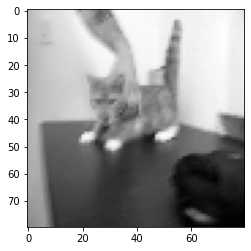

In [2]:
import os
main_dir = "C:/Users/hiefu/Downloads/422/dogs and cats"
train_dir = "train"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break

In [3]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)

In [4]:
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

In [5]:
#Normalize data
X = X / 255.0

In [6]:
train_dir = "test"
path = os.path.join(main_dir,train_dir)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test / 255.0

In [7]:
from datetime import datetime
start = datetime.now()

model_5 = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model_5.add(Conv2D(128,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model_5.add(MaxPooling2D(pool_size = (2,2)))

# Add another:
model_5.add(Conv2D(128,(3,3), activation = 'relu'))
model_5.add(MaxPooling2D(pool_size = (2,2)))

# Adds another:
model_5.add(Conv2D(128,(3,3), activation = 'relu'))
model_5.add(MaxPooling2D(pool_size = (2,2)))


model_5.add(Flatten())
model_5.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model_5.add(Dense(1, activation='sigmoid'))

model_5.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

end=datetime.now()
print('Total time spend:', end-start)

Instructions for updating:
Colocations handled automatically by placer.
Total time spend: 0:00:00.165784


In [8]:
start = datetime.now()
hist=model_5.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)
end = datetime.now()

print("Total time spend:", end-start)

Train on 20000 samples, validate on 5000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
20000/20000 [==============================] - 362s 18ms/sample - loss: 0.6277 - acc: 0.6515 - val_loss: 0.9890 - val_acc: 0.4106
Epoch 2/10
20000/20000 [==============================] - 360s 18ms/sample - loss: 0.5162 - acc: 0.7447 - val_loss: 0.6040 - val_acc: 0.6962
Epoch 3/10
20000/20000 [==============================] - 358s 18ms/sample - loss: 0.4410 - acc: 0.7944 - val_loss: 0.6719 - val_acc: 0.6574
Epoch 4/10
20000/20000 [==============================] - 356s 18ms/sample - loss: 0.3867 - acc: 0.8200 - val_loss: 0.5216 - val_acc: 0.7562
Epoch 5/10
20000/20000 [==============================] - 357s 18ms/sample - loss: 0.3397 - acc: 0.8472 - val_loss: 0.6138 - val_acc: 0.7114
Epoch 6/10
20000/20000 [==============================] - 357s 18ms/sample - loss: 0.2941 - acc: 0.8737 - val_loss: 0.5164 - val_acc: 0.7750
Epoch 7/10
20000/20000 [==============================] -

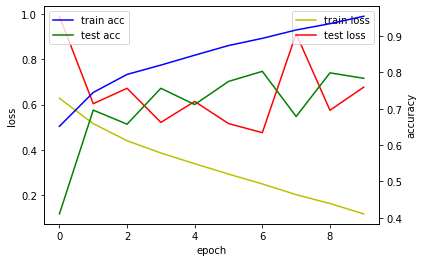

In [9]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='test acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [10]:
predictions_5 = model_5.predict(X_test)

In [11]:
predicted_val_5 = [int(round(p[0])) for p in predictions_5]

In [13]:
submission_df_5 = pd.DataFrame({'id':id_line, 'label':predicted_val_5})

submission_df_5.to_csv("submission_5.csv", index=False)

## Reference 

Cats vs Dogs:- Basic CNN tutorial: https://www.kaggle.com/ruchibahl18/cats-vs-dogs-basic-cnn-tutorial